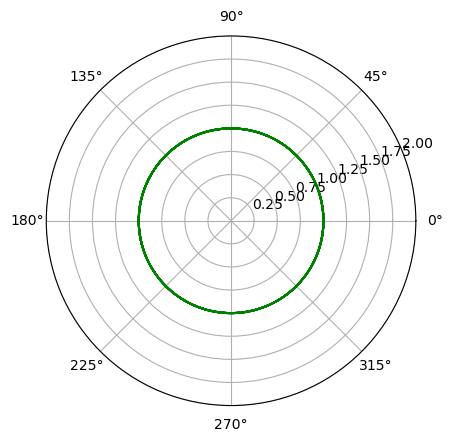

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib import animation
from matplotlib.animation import PillowWriter

# Constants 
ME = 5.97219e24 # Mass of Earth in kilograms
R = 1.496e11 # Distance from Earth to Sun in meters
T = 3.156e7 # Number of seconds in 1 year
G = 6.6743e-11*ME*T**2/R**3 # Gravitational Constant in terms of Earth Masses, Astronomical Units, and Years
PI = np.pi

# Differential System that we want to plot
def dSdt (t, S):
    r, theta, v = S
    return [v, ptheta/(m*r**2), ptheta**2/(m**2*r**3)-G*M/r**2]

# Parameters we can tweak
M = 333030 # Mass of the Sun / Mass of the Earth
m = 1 # Mass of the Earth / Mass of the Earth
ptheta = 2*PI # Angular Momentum
r0 = 1 # Initial Radial Displacement
theta0 = 0 # Initial Angular Displacement
vr0 = 0 # Initial Radial Velocity
max_t = 5
dimen = 2 # Max radius of polar plot
frames = 1000 # Number of frames in video

# Plot the path of motion
T = np.linspace(0, max_t, frames)
sol = solve_ivp(dSdt, (0, max_t), [r0, theta0, vr0], t_eval = T)
t, r, theta = sol.t, sol.y[0], sol.y[1]
plt.polar(theta, r, color="green")
plt.gca().set_ylim(0,dimen)
plt.show()

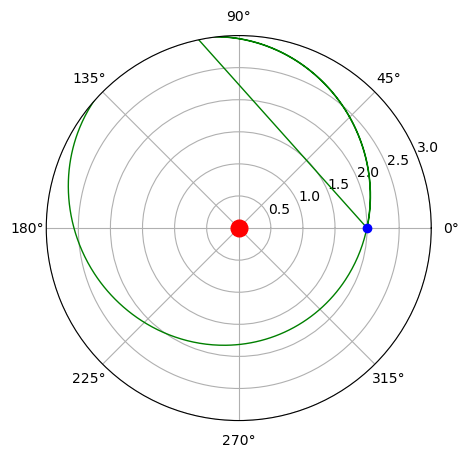

In [51]:
# Animate the motion of a planet
def animate (i):
    ln1.set_data([theta[i]], [r[i]])
    traceTheta.append(theta[i])
    traceR.append(r[i])
    trace.set_data(traceTheta, traceR)
    
fig, ax = plt.subplots(1, 1, figsize=(5,5), subplot_kw={'projection': 'polar'})
plt.plot(0, 0, "ro", markersize=12)
traceR = []
traceTheta = []
trace, = plt.polar(traceTheta, traceR, lw=1, color="green")
ln1, = plt.polar([], [], "bo", lw=3, markersize=6)
ax.set_ylim(0, dimen)
ani = animation.FuncAnimation(fig, animate, frames=frames, interval=25)
ani.save("1body-1.gif", writer='pillow', fps=30)